**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo:
Integrantes

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

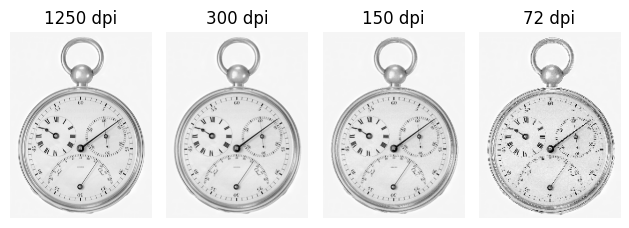

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

img = cv2.imread('relogio.tif')

def escala(dpiOriginal, dpiNovo):
  return dpiOriginal/dpiNovo

listaNovosDPIS = [1250, 300, 150, 72]

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Resolução na marra
for i, dpi in enumerate(listaNovosDPIS):
  plt.subplot(1, 4, i + 1)

  escalaIMG = escala(listaNovosDPIS[0], dpi)
  xSize = math.floor(img.shape[0] / escalaIMG)
  ySize = math.floor(img.shape[1] / escalaIMG)

  newIMG = np.zeros((xSize, ySize, img.shape[2]), dtype=img.dtype)

  for j in range(xSize):
    for k in range(ySize):
      newIMG[j, k] = img[int(j * escalaIMG), int(k * escalaIMG)]

  plt.title(f"{dpi} dpi")
  plt.imshow(cv2.cvtColor(newIMG, cv2.COLOR_BGR2RGB))
  plt.axis("off")

plt.tight_layout() #ajusta os espaços sozinhos

# #Resolução usando função do matplotlib
# i = 1
# for dpi in listaNovosDPIS:
#   plt.subplot(1, 4, i)
#   escalaIMG = escala(listaNovosDPIS[0], dpi)
#   imgReduzida = cv2.resize(imgRGB, None, fx=1/escalaIMG, fy=1/escalaIMG)
#   plt.imshow(imgReduzida)
#   plt.axis("off")
#   i+=1


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

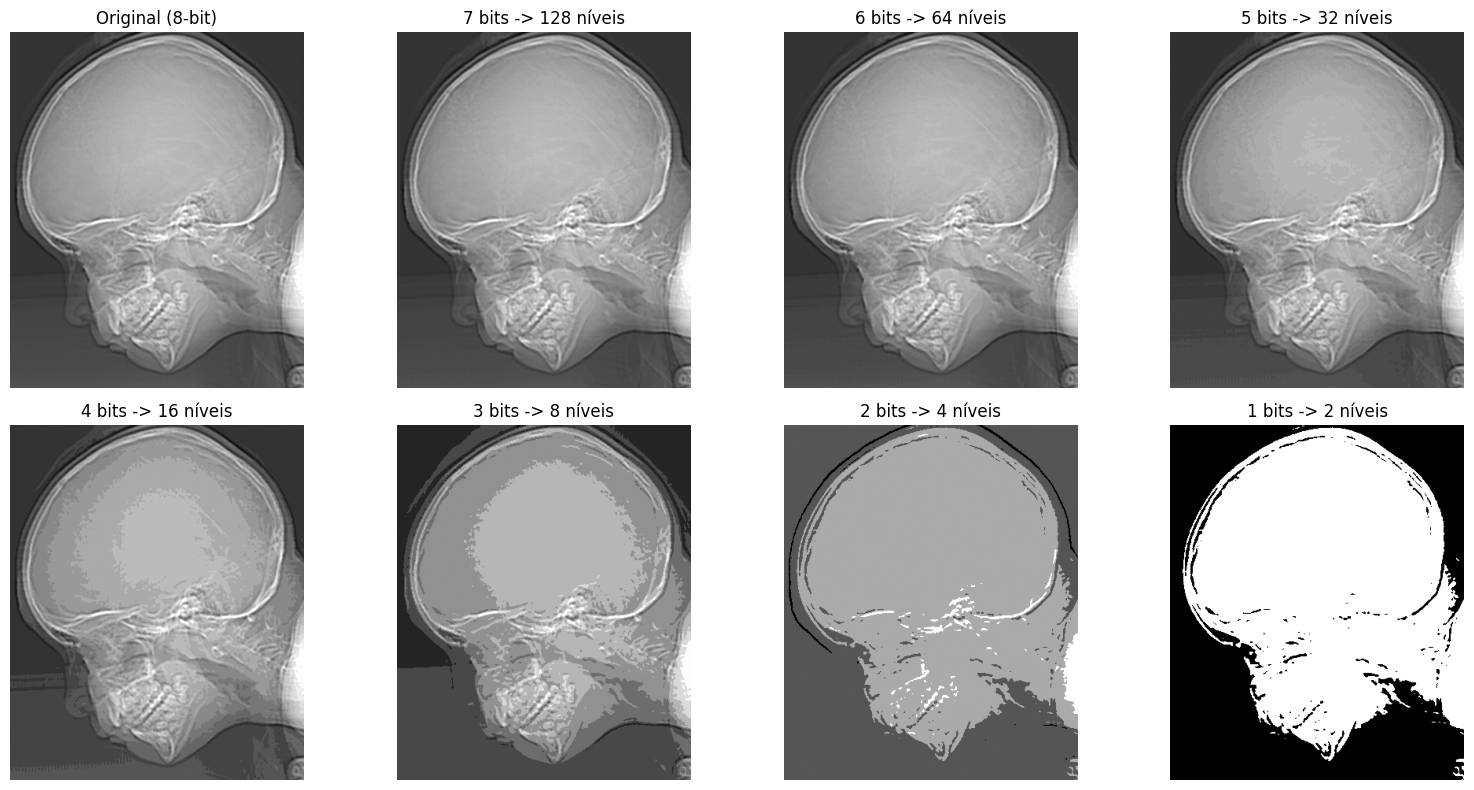

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE).astype(np.float32)

def quantize_bits(img, bits):
    levels = 2**bits
    step = 255 / (levels - 1)
    q = np.round(img / step) * step
    return np.clip(q, 0, 255).astype(np.uint8)

bits = [7, 6, 5, 4, 3, 2, 1]

plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Original (8-bit)")
plt.imshow(img.astype(np.uint8), cmap="gray", vmin=0, vmax=255)
plt.axis("off")

for k, b in enumerate(bits, start=2):
    qimg = quantize_bits(img, b)
    plt.subplot(2, 4, k)
    plt.title(f"{b} bits -> {2**b} níveis")
    plt.imshow(qimg, cmap="gray", vmin=0, vmax=255)
    plt.axis("off")

plt.tight_layout() #ajusta os espaços sozinhos
plt.show()